In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
from scipy import signal
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=18)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

### Load Samples

In [2]:
HMC_hyperparams_64  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_64.npz")
MCHMC_hyperparams_64  = np.load("../summaries/unmasked/hyperparams/MCHMC_hyperparams_Nside_64.npz")
MUSE_hyperparams_64  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_64.npz")

HMC_hyperparams_128  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_128.npz")
MCHMC_hyperparams_128  = np.load("../summaries/unmasked/hyperparams/MCHMC_hyperparams_Nside_128.npz")
MUSE_hyperparams_128  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_128.npz")

HMC_hyperparams_256  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_256.npz")
MCHMC_hyperparams_256 = np.load("../summaries/unmasked/hyperparams/MCHMC_hyperparams_Nside_256.npz")
MUSE_hyperparams_256  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_256.npz")

HMC_hyperparams_512  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_512.npz")
MCHMC_hyperparams_512  = np.load("../summaries/unmasked/hyperparams/MCHMC_hyperparams_Nside_512.npz")
MUSE_hyperparams_512  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_512.npz")

In [3]:
HMC_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/HMC_hyperparams_masked_Nside_512.npz")
MCHMC_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/MCHMC_hyperparams_masked_Nside_512.npz")
MUSE_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/MUSE_hyperparams_masked_Nside_512.npz")

### Make GetDist items

In [4]:
def make_chain(file, label, labels_dict={'r': 'r', 'Aphi': 'A_{\phi}'}):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        if param in labels_dict.keys():
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    samples = MCSamples(samples=samples, names=names, labels=labels, label=label,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})    
    print("========")
    return samples

In [5]:
HMC_chain_64   = make_chain(HMC_hyperparams_64, 'HMC - Unmasked Nside=64')
MCHMC_chain_64 = make_chain(MCHMC_hyperparams_64, 'MCHMC - Unmasked Nside=64')
MUSE_chain_64  = make_chain(MUSE_hyperparams_64, 'MUSE - Unmasked  Nside=64')

HMC_chain_128 = make_chain(HMC_hyperparams_128, 'HMC - Unmasked Nside=128')
MCHMC_chain_128 = make_chain(MCHMC_hyperparams_128, 'MCHMC - Unmasked Nside=128')
MUSE_chain_128 = make_chain(MUSE_hyperparams_128, 'MUSE - Unmasked Nside=128')

HMC_chain_256 = make_chain(HMC_hyperparams_256, 'HMC - Unmasked Nside=256')
MCHMC_chain_256 = make_chain(MCHMC_hyperparams_256, 'MCHMC - Unmasked Nside=256')
MUSE_chain_256 = make_chain(MUSE_hyperparams_256, 'MUSE - Unmasked Nside=256')

HMC_chain_512   = make_chain(HMC_hyperparams_512, 'HMC - Unmasked Nside=512')
MCHMC_chain_512 = make_chain(MCHMC_hyperparams_512, 'MCHMC - Unmasked Nside=512')
MUSE_chain_512  = make_chain(MUSE_hyperparams_512, 'MUSE - Unmasked Nside=512');

HMC - Unmasked Nside=64
Removed no burn in
MCHMC - Unmasked Nside=64
Removed no burn in
MUSE - Unmasked  Nside=64
Removed no burn in
HMC - Unmasked Nside=128
Removed no burn in
MCHMC - Unmasked Nside=128
Removed no burn in
MUSE - Unmasked Nside=128
Removed no burn in
HMC - Unmasked Nside=256
Removed no burn in
MCHMC - Unmasked Nside=256
Removed no burn in
MUSE - Unmasked Nside=256
Removed no burn in
HMC - Unmasked Nside=512
Removed no burn in
MCHMC - Unmasked Nside=512
Removed no burn in
MUSE - Unmasked Nside=512
Removed no burn in


In [6]:
HMC_chain_masked_512 = make_chain(HMC_hyperparams_masked_512, 'HMC - Masked Nside=512')
MCHMC_chain_masked_512 = make_chain(MCHMC_hyperparams_masked_512, 'MCHMC - Masked Nside=512')
MUSE_chain_masked_512  = make_chain(MUSE_hyperparams_masked_512, 'MUSE - Masked Nside=512');

HMC - Masked Nside=512
Removed no burn in
MCHMC - Masked Nside=512
Removed no burn in
MUSE - Masked Nside=512
Removed no burn in


### Compute ESS

In [7]:
def make_ESS(chain, nsamples=0 , which_ESS=np.min):
    ESS = which_ESS([chain.getEffectiveSamples(j=i) for i in np.arange(0,2)])
    if nsamples==0:
        nsamples = 20*len(chain['r'])
    return ESS

In [8]:
ESS_64  = np.array([make_ESS(HMC_chain_64), make_ESS(MCHMC_chain_64), make_ESS(MUSE_chain_64, nsamples=200)])
ESS_128 = np.array([make_ESS(HMC_chain_128), make_ESS(MCHMC_chain_128), make_ESS(MUSE_chain_128, nsamples=200)])
ESS_256 = np.array([make_ESS(HMC_chain_256), make_ESS(MCHMC_chain_256), make_ESS(MUSE_chain_256, nsamples=200)])
ESS_512 = np.array([make_ESS(HMC_chain_512), make_ESS(MCHMC_chain_512), make_ESS(MUSE_chain_512, nsamples=200)])

In [9]:
nsides = np.array([64, 128, 256, 512])
samplers = np.array(['HMC', 'MCLMC', 'MUSE'])

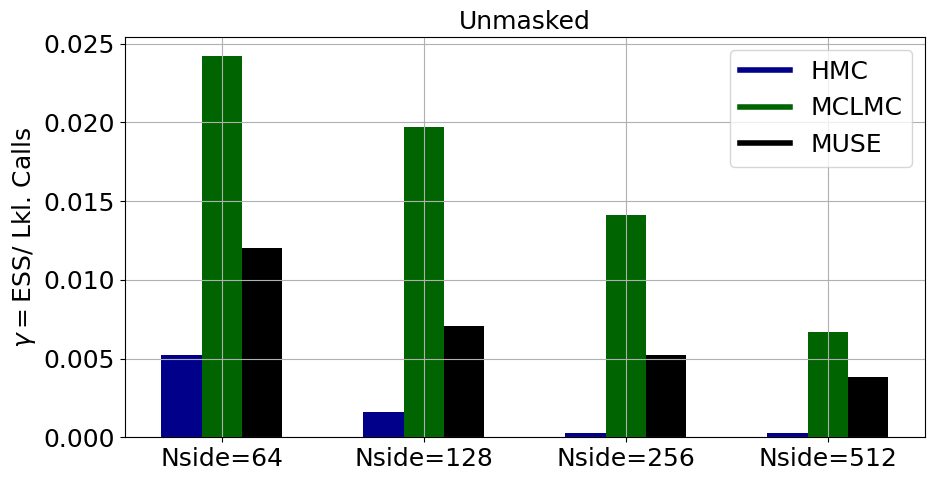

In [10]:
colors  =  ['darkblue', 'darkgreen', 'black']
#                   HMC     MCLMC   MUSE
ESS_64  = np.array([0.0052, 0.0242, 0.0120])
ESS_128 = np.array([0.0016, 0.0197, 0.0071])
ESS_256 = np.array([0.00030, 0.0141, 0.0052])
ESS_512 = np.array([0.000285, 0.0067, 0.0038])

X = np.arange(3)/5
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(X,     ESS_64,  color = colors, width = 0.2)
ax.bar(X + 1, ESS_128, color = colors, width = 0.2)
ax.bar(X + 2, ESS_256, color = colors, width = 0.2)
ax.bar(X + 3, ESS_512, color = colors, width = 0.2)

plt.ylabel(r"$\gamma=$ESS/ Lkl. Calls")
plt.xticks(np.array([X[1], X[1]+1, X[1]+2, X[1]+3]).flatten(),
           np.array([['Nside=64'], ['Nside=128'], ['Nside=256'], ['Nside=512']]).flatten())
plt.grid()
plt.title("Unmasked")

custom_lines = [Line2D([0], [0], color='darkblue', lw=4),
                Line2D([0], [0], color='darkgreen', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, samplers)
plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

### Posteriors

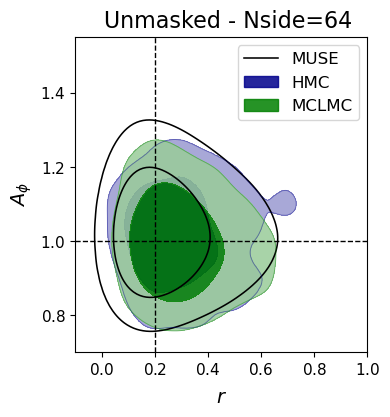

In [11]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_64, HMC_chain_64, MCHMC_chain_64], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[-0.1, 1.0, 0.7, 1.55])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=64', x=0.95, y=1.05, fontsize=16, color='black')
plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_64.pdf', bbox_inches='tight')

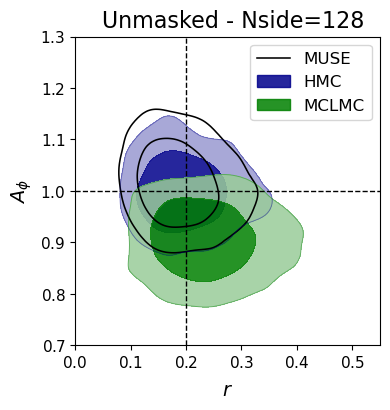

In [12]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_128, HMC_chain_128, MCHMC_chain_128], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0., 0.55, 0.7, 1.3])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=128', x=0.95, y=1.05, fontsize=16, color='black')
plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_128.pdf', bbox_inches='tight')

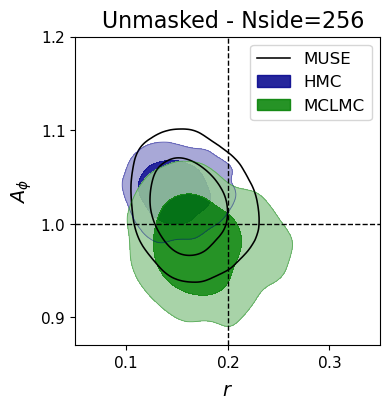

In [13]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_256, HMC_chain_256,  MCHMC_chain_256], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0.05, 0.35, 0.87, 1.2])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=256', x=0.95, y=1.05, fontsize=16, color='black')
plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_256.pdf', bbox_inches='tight')


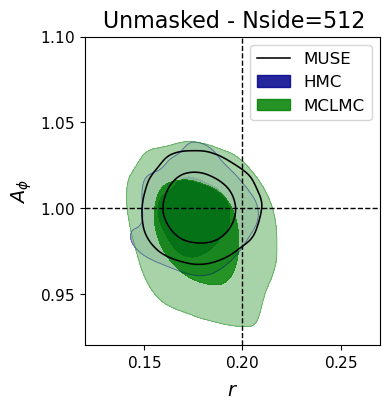

In [14]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_512, HMC_chain_512, MCHMC_chain_512], 'r', 'Aphi', 
           colors=['black', 'darkblue','green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0.12, 0.27, 0.92, 1.1])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=512', x=0.95, y=1.05, fontsize=16, color='black')
plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_512.pdf', bbox_inches='tight')

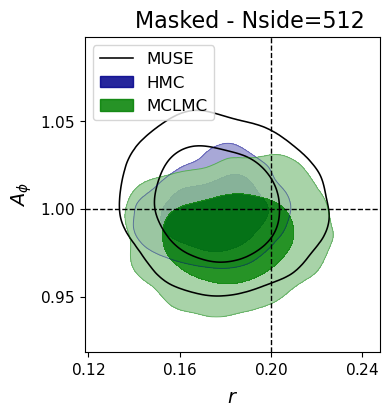

In [15]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_masked_512, HMC_chain_masked_512, MCHMC_chain_masked_512], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-', '-', '-'], 
           filled=[False, True, True])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Masked - Nside=512', x=0.95, y=1.05, fontsize=16, color='black')
plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/masked_512.pdf', bbox_inches='tight')

In [16]:
true_cls_64  = np.load("../summaries/true_cls_Nside_64.npz")
true_cls_128 = np.load("../summaries/true_cls_Nside_128.npz")
true_cls_256 = np.load("../summaries/true_cls_Nside_256.npz")
true_cls_512 = np.load("../summaries/true_cls_Nside_512.npz")

start_cls_64  = np.load("../summaries/start_cls_Nside_64.npz")
start_cls_128 = np.load("../summaries/start_cls_Nside_128.npz")
start_cls_256 = np.load("../summaries/start_cls_Nside_256.npz")
start_cls_512 = np.load("../summaries/start_cls_Nside_512.npz")

HMC_cls_64   = np.load("../summaries/HMC_cls_Nside_64.npz")
MCHMC_cls_64 = np.load("../summaries/MCHMC_cls_Nside_64.npz")

HMC_cls_128 = np.load("../summaries/HMC_cls_Nside_128.npz")
MCHMC_cls_128 = np.load("../summaries/MCHMC_cls_Nside_128.npz")

HMC_cls_256 = np.load("../summaries/HMC_cls_Nside_256.npz")
MCHMC_cls_256 = np.load("../summaries/MCHMC_cls_Nside_256.npz")

HMC_cls_512 = np.load("../summaries/HMC_cls_Nside_512.npz")
MCHMC_cls_512 = np.load("../summaries/MCHMC_cls_Nside_512.npz")

true_cls_masked_512 = np.load("../summaries/true_cls_masked_Nside_512.npz")
start_cls_masked_512 = np.load("../summaries/start_cls_masked_Nside_512.npz")
HMC_cls_masked_512 = np.load("../summaries/HMC_cls_masked_Nside_512.npz")
MCHMC_cls_masked_512 = np.load("../summaries/MCHMC_cls_masked_Nside_512.npz")

FileNotFoundError: [Errno 2] No such file or directory: '../summaries/true_cls_Nside_64.npz'

In [ ]:
fig, axis = plt.subplots(6, 4, figsize=(20,16), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# Nside=64
## phiphi
axis[0,0].plot(np.sort(start_cls_64["ells"]), true_cls_64["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,0].plot(np.sort(start_cls_64["ells"]), start_cls_64["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,0].plot(np.sort(start_cls_64["ells"]), HMC_cls_64["phi_cls_m"], 'r-', lw=2, label="HMC")
axis[0,0].fill_between(np.sort(start_cls_64["ells"]), HMC_cls_64["phi_cls_m"]+HMC_cls_64["phi_cls_s"],
                     HMC_cls_64["phi_cls_m"]-HMC_cls_64["phi_cls_s"], color='r', alpha=.3)
axis[0,0].plot(np.sort(start_cls_64["ells"]), MCHMC_cls_64["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["phi_cls_m"]+MCHMC_cls_64["phi_cls_s"],
                     MCHMC_cls_64["phi_cls_m"]-MCHMC_cls_64["phi_cls_s"], color='g', alpha=.3)
axis[0,0].set_title("Unmasked - Nside=64")
axis[0,0].set_xscale('log')
axis[0,0].set_yscale('log')
axis[0,0].set_ylabel(r"$Cl_{\phi \phi}$")
axis[0,0].legend()
axis[0,0].set_xticks([])
axis[0,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])

axis[1,0].plot(np.sort(start_cls_64["ells"]), np.abs(MCHMC_cls_64["phi_cls_m"]-true_cls_64["phi_cls_true"])/true_cls_64["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["phi_cls_s"]/true_cls_64["phi_cls_true"],
                     np.zeros(len(start_cls_64["ells"])), color='g', alpha=.2)
axis[1,0].set_xscale('log')
axis[1,0].set_yscale('log')
axis[1,0].set_xticklabels([])
axis[1,0].set_ylim([1e-3, 10])
axis[1,0].set_ylabel(r"$\delta Cl_{\phi \phi}$")
axis[1,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])
axis[1,0].grid()

## EE
axis[2,0].plot(np.sort(start_cls_64["ells"]), true_cls_64["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,0].plot(np.sort(start_cls_64["ells"]), start_cls_64["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,0].plot(np.sort(start_cls_64["ells"]), HMC_cls_64["E_cls_m"], 'r-', lw=2, label="HMC")
axis[2,0].fill_between(np.sort(start_cls_64["ells"]), HMC_cls_64["E_cls_m"]+HMC_cls_64["E_cls_s"],
                     HMC_cls_64["E_cls_m"]-HMC_cls_64["E_cls_s"], color='r', alpha=.3)
axis[2,0].plot(np.sort(start_cls_64["ells"]), MCHMC_cls_64["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["E_cls_m"]+MCHMC_cls_64["E_cls_s"],
                     MCHMC_cls_64["E_cls_m"]-MCHMC_cls_64["E_cls_s"], color='g', alpha=.3)
axis[2,0].set_xscale('log')
axis[2,0].set_yscale('log')
axis[2,0].set_ylabel(r"$Cl_{EE}$")
axis[2,0].set_xticks([])
axis[2,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])

axis[3,0].plot(np.sort(start_cls_64["ells"]), np.abs(MCHMC_cls_64["E_cls_m"]-true_cls_64["E_cls_true"])/true_cls_64["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["E_cls_s"]/true_cls_64["E_cls_true"],
                     np.zeros(len(start_cls_64["ells"])), color='g', alpha=.2)
axis[3,0].set_xscale('log')
axis[3,0].set_yscale('log')
axis[3,0].set_xticklabels([])
axis[3,0].set_ylim([1e-3, 10])
axis[3,0].set_ylabel(r"$\delta Cl_{EE}$")
axis[3,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])
axis[3,0].grid()

## BB
axis[4,0].plot(np.sort(start_cls_64["ells"]), true_cls_64["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,0].plot(np.sort(start_cls_64["ells"]), start_cls_64["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,0].plot(np.sort(start_cls_64["ells"]), HMC_cls_64["B_cls_m"], 'r-', lw=2, label="HMC")
axis[4,0].fill_between(np.sort(start_cls_64["ells"]), HMC_cls_64["B_cls_m"]+HMC_cls_64["B_cls_s"],
                     HMC_cls_64["B_cls_m"]-HMC_cls_64["B_cls_s"], color='r', alpha=.3)
axis[4,0].plot(np.sort(start_cls_64["ells"]), MCHMC_cls_64["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["B_cls_m"]+MCHMC_cls_64["B_cls_s"],
                     MCHMC_cls_64["B_cls_m"]-MCHMC_cls_64["B_cls_s"], color='g', alpha=.3)
axis[4,0].set_xscale('log')
axis[4,0].set_yscale('log')
axis[4,0].set_ylabel(r"$Cl_{BB}$")
axis[4,0].set_xlabel(r"$\ell$")
axis[4,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])

axis[5,0].plot(np.sort(start_cls_64["ells"]), np.abs(MCHMC_cls_64["B_cls_m"]-true_cls_64["B_cls_true"])/true_cls_64["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,0].fill_between(np.sort(start_cls_64["ells"]), MCHMC_cls_64["B_cls_s"]/true_cls_64["B_cls_true"],
                        np.zeros(len(start_cls_64["ells"])), color='g', alpha=.2)
axis[5,0].set_xscale('log')
axis[5,0].set_yscale('log')
axis[5,0].set_ylim([1e-3, 10])
axis[5,0].set_ylabel(r"$\delta Cl_{BB}$")
axis[5,0].set_xlabel(r"$\ell$")
axis[5,0].set_xlim(np.sort(start_cls_64["ells"])[0], np.sort(start_cls_64["ells"])[-1])
axis[5,0].grid()

# Nside=128
# EE
axis[0,1].plot(np.sort(start_cls_128["ells"]), true_cls_128["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,1].plot(np.sort(start_cls_128["ells"]), start_cls_128["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,1].plot(np.sort(start_cls_128["ells"]), HMC_cls_128["phi_cls_m"], 'r-', label="HMC")
axis[0,1].fill_between(np.sort(start_cls_128["ells"]), HMC_cls_128["phi_cls_m"]+HMC_cls_128["phi_cls_s"],
                     HMC_cls_128["phi_cls_m"]-HMC_cls_128["phi_cls_s"], color='r', alpha=.3)
axis[0,1].plot(np.sort(start_cls_128["ells"]), MCHMC_cls_128["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["phi_cls_m"]+MCHMC_cls_128["phi_cls_s"],
                     MCHMC_cls_128["phi_cls_m"]-MCHMC_cls_128["phi_cls_s"], color='g', alpha=.3)
axis[0,1].set_title("Unmasked - Nside=128")
axis[0,1].set_xscale('log')
axis[0,1].set_yscale('log')
axis[0,1].set_xticks([])
axis[0,1].set_yticks([])
axis[0,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])

axis[1,1].plot(np.sort(start_cls_128["ells"]), np.abs(MCHMC_cls_128["phi_cls_m"]-true_cls_128["phi_cls_true"])/true_cls_128["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["phi_cls_s"]/true_cls_128["phi_cls_true"],
                     np.zeros(len(start_cls_128["ells"])), color='g', alpha=.2)
axis[1,1].set_xscale('log')
axis[1,1].set_yscale('log')
axis[1,1].set_xticklabels([])
axis[1,1].set_ylim([1e-3, 10])
axis[1,1].set_yticklabels([])
axis[1,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])
axis[1,1].grid()

# EE
axis[2,1].plot(np.sort(start_cls_128["ells"]), true_cls_128["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,1].plot(np.sort(start_cls_128["ells"]), start_cls_128["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,1].plot(np.sort(start_cls_128["ells"]), HMC_cls_128["E_cls_m"], 'r-', label="HMC")
axis[2,1].fill_between(np.sort(start_cls_128["ells"]), HMC_cls_128["E_cls_m"]+HMC_cls_128["E_cls_s"],
                     HMC_cls_128["E_cls_m"]-HMC_cls_128["E_cls_s"], color='r', alpha=.3)
axis[2,1].plot(np.sort(start_cls_128["ells"]), MCHMC_cls_128["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["E_cls_m"]+MCHMC_cls_128["E_cls_s"],
                     MCHMC_cls_128["E_cls_m"]-MCHMC_cls_128["E_cls_s"], color='g', alpha=.3)
axis[2,1].set_xscale('log')
axis[2,1].set_yscale('log')
axis[2,1].set_xticks([])
axis[2,1].set_yticklabels([])
axis[2,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])

axis[3,1].plot(np.sort(start_cls_128["ells"]), np.abs(MCHMC_cls_128["E_cls_m"]-true_cls_128["E_cls_true"])/true_cls_128["E_cls_true"], 'k-', lw=2, label="MCLMC")	
axis[3,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["E_cls_s"]/true_cls_128["E_cls_true"],
                        np.zeros(len(start_cls_128["ells"])), color='g', alpha=.2)
axis[3,1].set_xscale('log')
axis[3,1].set_yscale('log')
axis[3,1].set_xticklabels([])
axis[3,1].set_ylim([1e-3, 10])
axis[3,1].set_yticks([])
axis[3,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])
axis[3,1].grid()

# BB
axis[4,1].plot(np.sort(start_cls_128["ells"]), true_cls_128["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,1].plot(np.sort(start_cls_128["ells"]), start_cls_128["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,1].plot(np.sort(start_cls_128["ells"]), HMC_cls_128["B_cls_m"], 'r-', label="HMC")
axis[4,1].fill_between(np.sort(start_cls_128["ells"]), HMC_cls_128["B_cls_m"]+HMC_cls_128["B_cls_s"],
                     HMC_cls_128["B_cls_m"]-HMC_cls_128["B_cls_s"], color='r', alpha=.3)
axis[4,1].plot(np.sort(start_cls_128["ells"]), MCHMC_cls_128["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["B_cls_m"]+MCHMC_cls_128["B_cls_s"],
                     MCHMC_cls_128["B_cls_m"]-MCHMC_cls_128["B_cls_s"], color='g', alpha=.3)
axis[4,1].set_xscale('log')
axis[4,1].set_yscale('log')
axis[4,1].set_yticks([])
axis[4,1].set_xlabel(r"$\ell$")
axis[4,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])

axis[5,1].plot(np.sort(start_cls_128["ells"]), np.abs(MCHMC_cls_128["B_cls_m"]-true_cls_128["B_cls_true"])/true_cls_128["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,1].fill_between(np.sort(start_cls_128["ells"]), MCHMC_cls_128["B_cls_s"]/true_cls_128["B_cls_true"],
                        np.zeros(len(start_cls_128["ells"])), color='g', alpha=.2)
axis[5,1].set_xscale('log')
axis[5,1].set_yscale('log')
axis[5,1].set_yticklabels([])
axis[5,1].set_xlabel(r"$\ell$")
axis[5,1].set_ylim([1e-3, 10])
axis[5,1].set_xlim(np.sort(start_cls_128["ells"])[0], np.sort(start_cls_128["ells"])[-1])
axis[5,1].grid()

# Nside=256
## phiphi
axis[0,2].plot(np.sort(start_cls_256["ells"]), true_cls_256["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,2].plot(np.sort(start_cls_256["ells"]), start_cls_256["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,2].plot(np.sort(start_cls_256["ells"]), HMC_cls_256["phi_cls_m"], 'r-', label="HMC")
axis[0,2].fill_between(np.sort(start_cls_256["ells"]), HMC_cls_256["phi_cls_m"]+HMC_cls_256["phi_cls_s"],
                     HMC_cls_256["phi_cls_m"]-HMC_cls_256["phi_cls_s"], color='r', alpha=.3)
axis[0,2].plot(np.sort(start_cls_256["ells"]), MCHMC_cls_256["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["phi_cls_m"]+MCHMC_cls_256["phi_cls_s"],
                     MCHMC_cls_256["phi_cls_m"]-MCHMC_cls_256["phi_cls_s"], color='g', alpha=.3)
axis[0,2].set_title("Unmasked - Nside=256")
axis[0,2].set_xscale('log')
axis[0,2].set_yscale('log')
axis[0,2].set_xticks([])
axis[0,2].set_yticklabels([])
axis[0,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])

axis[1,2].plot(np.sort(start_cls_256["ells"]), np.abs(MCHMC_cls_256["phi_cls_m"]-true_cls_256["phi_cls_true"])/true_cls_256["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["phi_cls_s"]/true_cls_256["phi_cls_true"],
                        np.zeros(len(start_cls_256["ells"])), color='g', alpha=.2)
axis[1,2].set_xscale('log')	
axis[1,2].set_yscale('log')
axis[1,2].set_xticklabels([])
axis[1,2].set_ylim([1e-3, 10])
axis[1,2].set_yticks([])
axis[1,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])
axis[1,2].grid()

## EE
axis[2,2].plot(np.sort(start_cls_256["ells"]), true_cls_256["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,2].plot(np.sort(start_cls_256["ells"]), start_cls_256["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,2].plot(np.sort(start_cls_256["ells"]), HMC_cls_256["E_cls_m"], 'r-', label="HMC")
axis[2,2].fill_between(np.sort(start_cls_256["ells"]), HMC_cls_256["E_cls_m"]+HMC_cls_256["E_cls_s"],
                     HMC_cls_256["E_cls_m"]-HMC_cls_256["E_cls_s"], color='r', alpha=.3)
axis[2,2].plot(np.sort(start_cls_256["ells"]), MCHMC_cls_256["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["E_cls_m"]+MCHMC_cls_256["E_cls_s"],
                     MCHMC_cls_256["E_cls_m"]-MCHMC_cls_256["E_cls_s"], color='g', alpha=.3)
axis[2,2].set_xscale('log')
axis[2,2].set_yscale('log')
axis[2,2].set_xticks([])
axis[2,2].set_yticklabels([])
axis[2,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])

axis[3,2].plot(np.sort(start_cls_256["ells"]), np.abs(MCHMC_cls_256["E_cls_m"]-true_cls_256["E_cls_true"])/true_cls_256["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["E_cls_s"]/true_cls_256["E_cls_true"],
                        np.zeros(len(start_cls_256["ells"])), color='g', alpha=.2)	
axis[3,2].set_xscale('log')
axis[3,2].set_yscale('log')
axis[3,2].set_xticklabels([])
axis[3,2].set_ylim([1e-3, 10])
axis[3,2].set_yticks([])
axis[3,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])
axis[3,2].grid()

## BB
axis[4,2].plot(np.sort(start_cls_256["ells"]), true_cls_256["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,2].plot(np.sort(start_cls_256["ells"]), start_cls_256["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,2].plot(np.sort(start_cls_256["ells"]), HMC_cls_256["B_cls_m"], 'r-', label="HMC")
axis[4,2].fill_between(np.sort(start_cls_256["ells"]), HMC_cls_256["B_cls_m"]+HMC_cls_256["B_cls_s"],
                     HMC_cls_256["B_cls_m"]-HMC_cls_256["B_cls_s"], color='r', alpha=.3)
axis[4,2].plot(np.sort(start_cls_256["ells"]), MCHMC_cls_256["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["B_cls_m"]+MCHMC_cls_256["B_cls_s"],
                     MCHMC_cls_256["B_cls_m"]-MCHMC_cls_256["B_cls_s"], color='g', alpha=.3)
axis[4,2].set_xscale('log')
axis[4,2].set_yscale('log')
axis[4,2].set_yticklabels([])
axis[4,2].set_xlabel(r"$\ell$")
axis[4,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])

axis[5,2].plot(np.sort(start_cls_256["ells"]), np.abs(MCHMC_cls_256["B_cls_m"]-true_cls_256["B_cls_true"])/true_cls_256["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,2].fill_between(np.sort(start_cls_256["ells"]), MCHMC_cls_256["B_cls_s"]/true_cls_256["B_cls_true"],
                        np.zeros(len(start_cls_256["ells"])), color='g', alpha=.2)
axis[5,2].set_xscale('log')
axis[5,2].set_yscale('log')
axis[5,2].set_yticklabels([])
axis[5,2].set_xlabel(r"$\ell$")
axis[5,2].set_ylim([1e-3, 10])
axis[5,2].set_xlim(np.sort(start_cls_256["ells"])[0], np.sort(start_cls_256["ells"])[-1])
axis[5,2].grid()

# Nside=512
## phiphi
axis[0,3].plot(np.sort(start_cls_512["ells"]), true_cls_512["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,3].plot(np.sort(start_cls_512["ells"]), start_cls_512["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,3].plot(np.sort(start_cls_512["ells"]), HMC_cls_512["phi_cls_m"], 'r-', lw=2, label="HMC")
axis[0,3].fill_between(np.sort(start_cls_512["ells"]), HMC_cls_512["phi_cls_m"]+HMC_cls_512["phi_cls_s"],
                     HMC_cls_512["phi_cls_m"]-HMC_cls_512["phi_cls_s"], color='r', alpha=.3)
axis[0,3].plot(np.sort(start_cls_512["ells"]), MCHMC_cls_512["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["phi_cls_m"]+MCHMC_cls_512["phi_cls_s"],
                     MCHMC_cls_512["phi_cls_m"]-MCHMC_cls_512["phi_cls_s"], color='g', alpha=.3)
axis[0,3].set_title("Unmasked - Nside=512")
axis[0,3].set_xscale('log')
axis[0,3].set_yscale('log')
axis[0,3].set_xticks([])
axis[0,3].set_yticks([])
axis[0,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])

axis[1,3].plot(np.sort(start_cls_512["ells"]), np.abs(MCHMC_cls_512["phi_cls_m"]-true_cls_512["phi_cls_true"])/true_cls_512["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["phi_cls_s"]/true_cls_512["phi_cls_true"],
                     np.zeros(len(start_cls_512["ells"])), color='g', alpha=.2)
axis[1,3].set_xscale('log')
axis[1,3].set_yscale('log')
axis[1,3].set_xticklabels([])
axis[1,3].set_ylim([1e-3, 10])
axis[1,3].set_yticklabels([])
axis[1,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])  
axis[1,3].grid()

## EE
axis[2,3].plot(np.sort(start_cls_512["ells"]), true_cls_512["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,3].plot(np.sort(start_cls_512["ells"]), start_cls_512["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,3].plot(np.sort(start_cls_512["ells"]), HMC_cls_512["E_cls_m"], 'r-', lw=2, label="HMC")
axis[2,3].fill_between(np.sort(start_cls_512["ells"]), HMC_cls_512["E_cls_m"]+HMC_cls_512["E_cls_s"],
                     HMC_cls_512["E_cls_m"]-HMC_cls_512["E_cls_s"], color='r', alpha=.3)
axis[2,3].plot(np.sort(start_cls_512["ells"]), MCHMC_cls_512["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["E_cls_m"]+MCHMC_cls_512["E_cls_s"],
                     MCHMC_cls_512["E_cls_m"]-MCHMC_cls_512["E_cls_s"], color='g', alpha=.3)
axis[2,3].set_xscale('log')
axis[2,3].set_yscale('log')
axis[2,3].set_xticks([])
axis[2,3].set_yticks([])
axis[2,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])

axis[3,3].plot(np.sort(start_cls_512["ells"]), np.abs(MCHMC_cls_512["E_cls_m"]-true_cls_512["E_cls_true"])/true_cls_512["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["E_cls_s"]/true_cls_512["E_cls_true"],
                        np.zeros(len(start_cls_512["ells"])), color='g', alpha=.2)
axis[3,3].set_xscale('log')
axis[3,3].set_yscale('log')
axis[3,3].set_xticklabels([])
axis[3,3].set_ylim([1e-3, 10])
axis[3,3].set_yticklabels([])
axis[3,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])
axis[3,3].grid()

## BB
axis[4,3].plot(np.sort(start_cls_512["ells"]), true_cls_512["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,3].plot(np.sort(start_cls_512["ells"]), start_cls_512["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,3].plot(np.sort(start_cls_512["ells"]), HMC_cls_512["B_cls_m"], 'r-', lw=2, label="HMC")
axis[4,3].fill_between(np.sort(start_cls_512["ells"]), HMC_cls_512["B_cls_m"]+HMC_cls_512["B_cls_s"],
                     HMC_cls_512["B_cls_m"]-HMC_cls_512["B_cls_s"], color='r', alpha=.3)
axis[4,3].plot(np.sort(start_cls_512["ells"]), MCHMC_cls_512["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["B_cls_m"]+MCHMC_cls_512["B_cls_s"],
                     MCHMC_cls_512["B_cls_m"]-MCHMC_cls_512["B_cls_s"], color='g', alpha=.3)
axis[4,3].set_xscale('log')
axis[4,3].set_yscale('log')
axis[4,3].set_yticks([])
axis[4,3].set_xlabel(r"$\ell$")
axis[4,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])

axis[5,3].plot(np.sort(start_cls_512["ells"]), np.abs(MCHMC_cls_512["B_cls_m"]-true_cls_512["B_cls_true"])/true_cls_512["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,3].fill_between(np.sort(start_cls_512["ells"]), MCHMC_cls_512["B_cls_s"]/true_cls_512["B_cls_true"],
                        np.zeros(len(start_cls_512["ells"])), color='g', alpha=.2)
axis[5,3].set_xscale('log')
axis[5,3].set_yscale('log')
axis[5,3].set_yticklabels([])
axis[5,3].set_xlabel(r"$\ell$")
axis[5,3].set_ylim([1e-3, 10])
axis[5,3].set_xlim(np.sort(start_cls_512["ells"])[0], np.sort(start_cls_512["ells"])[-1])
axis[5,3].grid()

plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/phiphi_EE_BB.pdf", bbox_inches='tight')
plt.show()


In [ ]:
fig, axis = plt.subplots(6, figsize=(5,12), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# phi-phi
axis[0].plot(np.sort(start_cls_masked_512["ells"]), true_cls_masked_512["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0].plot(np.sort(start_cls_masked_512["ells"]), start_cls_masked_512["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0].plot(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0].fill_between(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["phi_cls_m"]+HMC_cls_masked_512["phi_cls_s"],
                     HMC_cls_masked_512["phi_cls_m"]-HMC_cls_masked_512["phi_cls_s"], color='b', alpha=.3)
axis[0].plot(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["phi_cls_m"]+MCHMC_cls_masked_512["phi_cls_s"],
                     MCHMC_cls_masked_512["phi_cls_m"]-MCHMC_cls_masked_512["phi_cls_s"], color='g', alpha=.3)
axis[0].set_title("Masked - Nside=512")
axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_ylabel(r"$Cl_{\phi \phi}$")
axis[0].legend()
axis[0].set_xticks([])
axis[0].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])

axis[1].plot(np.sort(start_cls_masked_512["ells"]), np.abs(MCHMC_cls_masked_512["phi_cls_m"]-true_cls_masked_512["phi_cls_true"])/true_cls_masked_512["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["phi_cls_s"]/true_cls_masked_512["phi_cls_true"],
                     np.zeros(len(start_cls_masked_512["ells"])), color='g', alpha=.2)
axis[1].set_xscale('log')
axis[1].set_yscale('log')
axis[1].set_xticklabels([])
axis[1].set_ylim([1e-3, 1])
axis[1].set_ylabel(r"$\delta Cl_{\phi \phi}$")
axis[1].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])
axis[1].grid()

# EE
axis[2].plot(np.sort(start_cls_masked_512["ells"]), true_cls_masked_512["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2].plot(np.sort(start_cls_masked_512["ells"]), start_cls_masked_512["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2].plot(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["E_cls_m"], 'b-', lw=2, label="MCLMC")
axis[2].fill_between(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["E_cls_m"]+HMC_cls_masked_512["E_cls_s"],
                     HMC_cls_masked_512["E_cls_m"]-HMC_cls_masked_512["E_cls_s"], color='b', alpha=.3)
axis[2].plot(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["E_cls_m"]+MCHMC_cls_masked_512["E_cls_s"],
                     MCHMC_cls_masked_512["E_cls_m"]-MCHMC_cls_masked_512["E_cls_s"], color='g', alpha=.3)
axis[2].set_xscale('log')
axis[2].set_yscale('log')
axis[2].set_ylabel(r"$Cl_{EE}$")
axis[2].set_xticks([])
axis[2].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])

axis[3].plot(np.sort(start_cls_masked_512["ells"]), np.abs(MCHMC_cls_masked_512["E_cls_m"]-true_cls_masked_512["E_cls_true"])/true_cls_masked_512["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["E_cls_s"]/true_cls_masked_512["E_cls_true"],
                     np.zeros(len(start_cls_masked_512["ells"])), color='g', alpha=.2)
axis[3].set_xscale('log')
axis[3].set_yscale('log')
axis[3].set_xticklabels([])
axis[3].set_ylim([1e-3, 1])
axis[3].set_ylabel(r"$\delta Cl_{EE}$")
axis[3].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])
axis[3].grid()

# BB
axis[4].plot(np.sort(start_cls_masked_512["ells"]), true_cls_masked_512["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4].plot(np.sort(start_cls_masked_512["ells"]), start_cls_masked_512["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4].plot(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["B_cls_m"], 'b-', lw=2, label="MCLMC")
axis[4].fill_between(np.sort(start_cls_masked_512["ells"]), HMC_cls_masked_512["B_cls_m"]+HMC_cls_masked_512["B_cls_s"],
                     HMC_cls_masked_512["B_cls_m"]-HMC_cls_masked_512["B_cls_s"], color='b', alpha=.3)
axis[4].plot(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["B_cls_m"]+MCHMC_cls_masked_512["B_cls_s"],
                     MCHMC_cls_masked_512["B_cls_m"]-MCHMC_cls_masked_512["B_cls_s"], color='g', alpha=.3)
axis[4].set_xscale('log')
axis[4].set_yscale('log')
axis[4].set_ylabel(r"$Cl_{BB}$")
axis[4].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])

axis[5].plot(np.sort(start_cls_masked_512["ells"]), np.abs(MCHMC_cls_masked_512["B_cls_m"]-true_cls_masked_512["B_cls_true"])/true_cls_masked_512["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5].fill_between(np.sort(start_cls_masked_512["ells"]), MCHMC_cls_masked_512["B_cls_s"]/true_cls_masked_512["B_cls_true"],
                     np.zeros(len(start_cls_masked_512["ells"])), color='g', alpha=.2)
axis[5].set_xscale('log')
axis[5].set_yscale('log')
axis[5].set_xlabel(r"$\ell$")
axis[5].set_ylim([1e-3, 1])
axis[5].set_ylabel(r"$\delta Cl_{BB}$")
axis[5].set_xlim(np.sort(start_cls_masked_512["ells"])[0], np.sort(start_cls_masked_512["ells"])[-1])
axis[5].grid()

plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/masked_phiphi_EE_BB.pdf", bbox_inches='tight')
plt.show()

In [ ]:
def compute_k(vars):
    return np.max(vars)/np.min(vars)

def make_k_table(file):
    unmasked_k = compute_k(file["unmasked_vars"])
    precond_unmasked_k = compute_k(file["precond_unmasked_vars"])
    masked_k = compute_k(file["masked_vars"])
    precond_masked_k = compute_k(file["precond_masked_vars"])
    pixel_precond_masked_k = compute_k(file["pixel_precond_masked_vars"])

    print()
    

In [ ]:
print("&", "$", constraint, "$", end = " ")

In [ ]:
Nside_512_vars['unmasked_vars']

In [ ]:
Nside_512_vars = np.load("../summaries/Nside_512_vars.npz")

In [ ]:
unmasked_k = compute_k(Nside_512_vars["unmasked_vars"])
unmasked_k

In [ ]:
precond_unmasked_k = np.max(Nside_512_vars["precond_unmasked_vars"])/np.min(Nside_512_vars["precond_unmasked_vars"])
np.round(precond_unmasked_k)

In [ ]:
masked_k = np.max(Nside_512_vars["masked_vars"])/np.min(Nside_512_vars["masked_vars"])
np.round(masked_k)

In [ ]:
precond_masked_k = np.max(Nside_512_vars["precond_masked_vars"])/np.min(Nside_512_vars["precond_masked_vars"])
np.round(precond_masked_k)

In [ ]:
pixel_precond_masked_k = np.max(Nside_512_vars["pixel_precond_masked_vars"])/np.min(Nside_512_vars["pixel_precond_masked_vars"])
np.round(pixel_precond_masked_k)

In [ ]:
fig, axis = plt.subplots(2, figsize=(6,8))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0)

axis[0].plot(np.arange(786434) ,np.ones(786434), 'k--')
axis[0].plot(Nside_512_vars["unmasked_vars"], 'r-', label=r"$\theta$ ", alpha=0.6)
axis[0].plot(Nside_512_vars["precond_unmasked_vars"], 'b-', label=r"$\Lambda \cdot \theta$", alpha=0.6)
axis[0].grid()
axis[0].set_ylabel(r"$\sigma^2$")
axis[0].title.set_text("Unmasked - Nside=512")
#axis[0].set_ylim(0, 3)
axis[0].legend()
axis[0].set_xticklabels([])
axis[0].set_xlim(0, 786434)
axis[0].set_yscale('log')

axis[1].plot(np.arange(786434) ,np.ones(786434), 'k--')
axis[1].plot(Nside_512_vars["masked_vars"], 'r-', label=r"$\theta$", alpha=0.6)
axis[1].plot(Nside_512_vars["precond_masked_vars"], 'b-', label=r"$\Lambda \cdot \theta$", alpha=0.6)
axis[1].plot(Nside_512_vars["pixel_precond_masked_vars"], 'g-', label=r"$(\Lambda_p  \Lambda) \cdot \theta$", alpha=0.6)
axis[1].grid()
axis[1].set_ylabel(r"$\sigma^2$")
axis[1].title.set_text("Masked - Nside=512")
#axis[1].set_ylim(0, 30)
axis[1].legend()
axis[1].set_xlim(0, 786434)
axis[1].set_yscale('log')
plt.show()
plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/vars.pdf")

In [ ]:
def make_table_getdist(params, chains):
    for chain in chains:
        print(chain.label, end = " ")
        for param in params:
            constraint = chain.getInlineLatex(param)
            constraint = constraint[constraint.index("=")+1:] 
            print("&", "$", constraint, "$", end = " ")
        print( "\\\\ \\hline")

In [ ]:
make_table_getdist(['r', 'Aphi'], 
    [HMC_chain_64, MCHMC_chain_64, MUSE_chain_64,
     HMC_chain_128, MCHMC_chain_128, MUSE_chain_128,
     HMC_chain_256, MCHMC_chain_256, MUSE_chain_256,
     HMC_chain_512, MCHMC_chain_512, MUSE_chain_512,
     MCHMC_chain_masked_512, MUSE_chain_masked_512])